<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fetch-and-format-the-dataset" data-toc-modified-id="Fetch-and-format-the-dataset-1">Fetch and format the dataset</a></span><ul class="toc-item"><li><span><a href="#Add-Rata-Die" data-toc-modified-id="Add-Rata-Die-1.1">Add Rata Die</a></span></li></ul></li></ul></div>

In [1]:
show_help = false
include("MarketIndicators.jl") 

# Fetch and format the dataset

In [2]:
date_format = "mm/dd/yyyy" # Actual Date format the CSV file is using in i.e. "2007.04.05" or "u. dd, yyyy"
dataset_file_name = "Macroeconomic Outlook.csv"
df = fetch_dataset(dataset_file_name, date_format)
df = df[:,1:2] # I want only first 2 columns
columns = preview_data(df)
record_count = size(df)[1]
println("record_count: ", record_count )

13×2 DataFrame
│ Row │ Date       │ Stocks │
│     │ Date       │ String │
├─────┼────────────┼────────┤
│ 1   │ 1928-07-27 │ BUY    │
│ 2   │ 1942-04-20 │ BUY    │
│ 3   │ 1961-12-04 │ SELL   │
│ 4   │ 1998-01-05 │ BUY    │
│ 5   │ 1999-08-30 │ SELL   │
│ 6   │ 2007-07-09 │ SELL   │
│ 7   │ 2009-06-01 │ SELL   │
│ 8   │ 2012-03-25 │ SELL   │
│ 9   │ 2014-01-01 │ SELL   │
│ 10  │ 2014-11-30 │ SELL   │
│ 11  │ 2015-06-28 │ BUY    │
│ 12  │ 2019-10-08 │ BUY    │
│ 13  │ 2020-07-22 │ SELL   │
 Dataset dimentions: (125, 2)

 Column numbering:
1 Date
2 Stocks
record_count: 125


## Add Rata Die

In [3]:
add_rata_die_column!(df)
println()

13×3 DataFrame
│ Row │ Rata_Die │ Date       │ Stocks │
│     │ Int64    │ Date       │ String │
├─────┼──────────┼────────────┼────────┤
│ 1   │ 10434    │ 1928-07-27 │ BUY    │
│ 2   │ 15449    │ 1942-04-20 │ BUY    │
│ 3   │ 22617    │ 1961-12-04 │ SELL   │
│ 4   │ 35798    │ 1998-01-05 │ BUY    │
│ 5   │ 36400    │ 1999-08-30 │ SELL   │
│ 6   │ 39270    │ 2007-07-09 │ SELL   │
│ 7   │ 39963    │ 2009-06-01 │ SELL   │
│ 8   │ 40991    │ 2012-03-25 │ SELL   │
│ 9   │ 41638    │ 2014-01-01 │ SELL   │
│ 10  │ 41971    │ 2014-11-30 │ SELL   │
│ 11  │ 42181    │ 2015-06-28 │ BUY    │
│ 12  │ 43744    │ 2019-10-08 │ BUY    │
│ 13  │ 44032    │ 2020-07-22 │ SELL   │
 Dataset dimentions: (125, 3)

 Column numbering:
1 Rata_Die
2 Date
3 Stocks



In [4]:
insert!(df, 4, zeros(Int64, record_count), :Preditions) # as 5th column
columns = preview_data(df)
println()

13×4 DataFrame
│ Row │ Rata_Die │ Date       │ Stocks │ Preditions │
│     │ Int64    │ Date       │ String │ Int64      │
├─────┼──────────┼────────────┼────────┼────────────┤
│ 1   │ 10434    │ 1928-07-27 │ BUY    │ 0          │
│ 2   │ 15449    │ 1942-04-20 │ BUY    │ 0          │
│ 3   │ 22617    │ 1961-12-04 │ SELL   │ 0          │
│ 4   │ 35798    │ 1998-01-05 │ BUY    │ 0          │
│ 5   │ 36400    │ 1999-08-30 │ SELL   │ 0          │
│ 6   │ 39270    │ 2007-07-09 │ SELL   │ 0          │
│ 7   │ 39963    │ 2009-06-01 │ SELL   │ 0          │
│ 8   │ 40991    │ 2012-03-25 │ SELL   │ 0          │
│ 9   │ 41638    │ 2014-01-01 │ SELL   │ 0          │
│ 10  │ 41971    │ 2014-11-30 │ SELL   │ 0          │
│ 11  │ 42181    │ 2015-06-28 │ BUY    │ 0          │
│ 12  │ 43744    │ 2019-10-08 │ BUY    │ 0          │
│ 13  │ 44032    │ 2020-07-22 │ SELL   │ 0          │
 Dataset dimentions: (125, 4)

 Column numbering:
1 Rata_Die
2 Date
3 Stocks
4 Preditions



In [6]:
for i in 1:record_count
    outlook = df[i,3]
    # println(outlook, typeof(outlook))
    if outlook == "BUY"
        df[i,4] = 127
    end
    if outlook == "SELL"
        df[i,4] = -128
    end
end
df = df[:,[1,2,4] ] # dropping column "Stocks"

columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Rata_Die │ Date       │ Preditions │
│     │ Int64    │ Date       │ Int64      │
├─────┼──────────┼────────────┼────────────┤
│ 1   │ 10434    │ 1928-07-27 │ 127        │
│ 2   │ 15449    │ 1942-04-20 │ 127        │
│ 3   │ 22617    │ 1961-12-04 │ -128       │
│ 4   │ 35798    │ 1998-01-05 │ 127        │
│ 5   │ 36400    │ 1999-08-30 │ -128       │
│ 6   │ 39270    │ 2007-07-09 │ -128       │
│ 7   │ 39963    │ 2009-06-01 │ -128       │
│ 8   │ 40991    │ 2012-03-25 │ -128       │
│ 9   │ 41638    │ 2014-01-01 │ -128       │
│ 10  │ 41971    │ 2014-11-30 │ -128       │
│ 11  │ 42181    │ 2015-06-28 │ 127        │
│ 12  │ 43744    │ 2019-10-08 │ 127        │
│ 13  │ 44032    │ 2020-07-22 │ -128       │
 Dataset dimentions: (125, 3)

 Column numbering:
1 Rata_Die
2 Date
3 Preditions



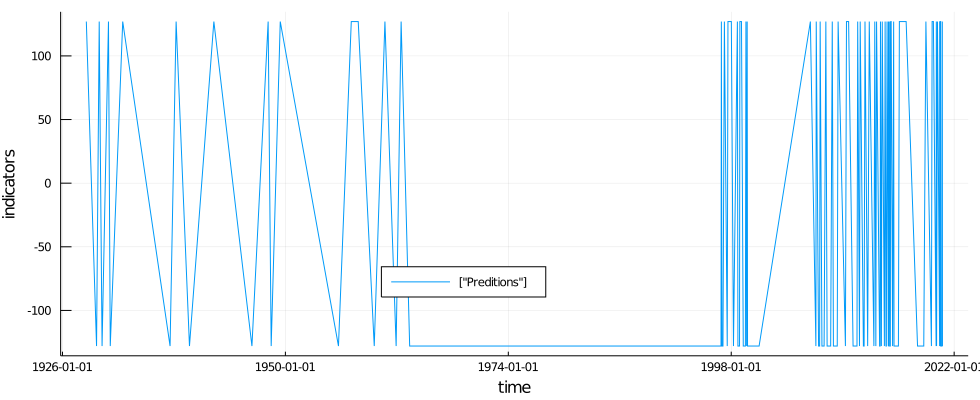

In [8]:
using Plots

# show range
rows = 1:record_count

gr()
plot(          df[rows, 2], # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3]   ]  ,
    legend   =:bottom, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )